<a href="https://colab.research.google.com/github/LiamButler04/Data-Acquisition-Project-Liam-Butler-C22306471/blob/main/Neil_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Google Drive**

In [223]:
#Mounting Google Drive so we can read/write files
from google.colab import drive
drive.mount('/content/drive')

# Notes: Describe what this cell does
NOTES_DIR = "/content/drive/MyDrive/Neil project 4th year"
import os
os.makedirs(NOTES_DIR, exist_ok=True)
with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
    f.write("Mounted Google Drive to access my dataset and save outputs.\n")
print("Drive mounted. Notes folder:", NOTES_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted. Notes folder: /content/drive/MyDrive/Neil project 4th year


**Importing Libraries**

In [224]:
#Importing core libraries (Pandas, Requests, BeautifulSoup) and plotting
import os, glob, re, time, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
    f.write("Imported pandas, requests, BeautifulSoup, matplotlib, seaborn.\n")
print("Libraries ready.")


Libraries ready.


**Locating Data**

In [225]:
#Trying to auto-find 'amazon books.csv' and set output file paths
candidates = glob.glob("/content/drive/MyDrive/**/*.csv", recursive=True)
books_path = next((p for p in candidates if os.path.basename(p).lower()=="amazon books.csv"), None)
if books_path is None:
    books_path = "/content/drive/MyDrive/Neil project 4th year/amazon books.csv"  # <- edit if needed

PROJECT_DIR = "/content/drive/MyDrive/Neil project 4th year"
os.makedirs(PROJECT_DIR, exist_ok=True)

CLEAN_OUT     = f"{PROJECT_DIR}/amazon_books_clean.csv"
GR_LIST_OUT   = f"{PROJECT_DIR}/goodreads_bestbooksever_raw.csv"
GR_CLEAN_OUT  = f"{PROJECT_DIR}/goodreads_bestbooksever_clean.csv"
MERGED_OUT    = f"{PROJECT_DIR}/amazon_x_goodreads_bestbooksever.csv"

with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
    f.write(f"Step 2: Using Amazon CSV at: {books_path}\n")
    f.write(f"Step 2: Output folder set to: {PROJECT_DIR}\n")
print("Using Amazon CSV:", books_path)


Using Amazon CSV: /content/drive/MyDrive/Neil project 4th year/amazon books.csv


**Loading Data**

In [226]:
#Loading the Amazon dataset and print shape/columns/head
books = pd.read_csv(books_path, low_memory=False)
print("Shape:", books.shape)
print("Columns:", list(books.columns))
display(books.head(3))

with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
    f.write(f"Loaded Amazon dataset. Shape = {books.shape[0]} rows × {books.shape[1]} cols.\n")


Shape: (2269, 40)
Columns: ['asin', 'ISBN10', 'answered_questions', 'availability', 'brand', 'currency', 'date_first_available', 'delivery', 'department', 'description', 'discount', 'domain', 'features', 'final_price', 'format', 'image_url', 'images_count', 'initial_price', 'item_weight', 'manufacturer', 'model_number', 'plus_content', 'product_dimensions', 'rating', 'reviews_count', 'root_bs_rank', 'seller_id', 'seller_name', 'timestamp', 'title', 'upc', 'url', 'video', 'video_count', 'categories', 'best_sellers_rank', 'buybox_seller', 'image', 'number_of_sellers', 'colors']


,asin,ISBN10,answered_questions,availability,brand,currency,date_first_available,delivery,department,description,discount,domain,features,final_price,format,image_url,images_count,initial_price,item_weight,manufacturer,model_number,plus_content,product_dimensions,rating,reviews_count,root_bs_rank,seller_id,seller_name,timestamp,title,upc,url,video,video_count,categories,best_sellers_rank,buybox_seller,image,number_of_sellers,colors
0,7350813,7350813,0,In Stock.,Emily Brontë,USD,NaN,"[""FREE delivery Tuesday, December 28 if you sp...",NaN,NaN,NaN,www.amazon.com,[],3.99,"[{""name"":""Kindle"",""price"":""$0.99"",""url"":""/Wuth...",https://images-na.ssl-images-amazon.com/images...,4,NaN,7.8 ounces,NaN,NaN,NaN,1 x 4.3 x 7 inches,4.6 out of 5 stars,13451,253400.0,ATVPDKIKX0DER,Amazon,2021-12-21T23:35:40.084Z,Wuthering Heights (Collins Classics),NaN,https://www.amazon.com/dp/0007350813,NaN,0,"[""Books"",""Literature & Fiction"",""Genre Fiction""]","[{""category"":""Books / Literature & Fiction / H...",NaN,NaN,NaN,NaN
1,7513763,9.78001E+12,0,In Stock.,Drew Daywalt,USD,NaN,"[""FREE delivery Tuesday, December 28 if you sp...",NaN,NaN,NaN,www.amazon.com,[],12.08,"[{""name"":""Kindle"",""price"":""$10.99"",""url"":""/Day...",https://images-na.ssl-images-amazon.com/images...,2,NaN,8.5 ounces,NaN,NaN,NaN,9.92 x 0.24 x 9.88 inches,4.8 out of 5 stars,16628,113569.0,ATVPDKIKX0DER,VMG Books & Media,2021-12-21T23:23:16.450Z,THE DAYS THE CRAYONS QUIT,NaN,https://www.amazon.com/dp/0007513763,NaN,0,"[""Books"",""Children's Books"",""Literature & Fict...","[{""category"":""Books / Children's Books / Liter...",VMG Books & Media,NaN,NaN,NaN
2,8183988,8183988,0,NaN,Bernard Cornwell,USD,NaN,"[""FREE delivery January 4 - 10 if you spend $2...",NaN,NaN,NaN,www.amazon.com,[],NaN,"[{""name"":""Kindle"",""price"":""$11.99"",""url"":""/War...",https://images-na.ssl-images-amazon.com/images...,6,NaN,12.3 ounces,NaN,NaN,NaN,5.08 x 1.18 x 7.8 inches,4.8 out of 5 stars,11275,26233.0,ATVPDKIKX0DER,Reuseaworld,2021-12-21T23:23:19.996Z,War Lord: Book 13 (The Last Kingdom Series),NaN,https://www.amazon.com/dp/0008183988,NaN,0,"[""Books"",""Literature & Fiction"",""Genre Fiction""]","[{""category"":""Books / Literature & Fiction / H...",Reuseaworld,NaN,NaN,NaN


**Assessing Data**

In [227]:
#Basic assessment: dtypes, missingness, duplicates
print("\nDtypes:\n", books.dtypes)
print("\nMissing per column:\n", books.isna().sum())
print("\nDuplicate rows:", books.duplicated().sum())

with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
    f.write("Assessed datatypes, missing values, and duplicate full rows.\n")



Dtypes:
 asin                     object
ISBN10                   object
answered_questions        int64
availability             object
brand                    object
currency                 object
date_first_available     object
delivery                 object
department              float64
description              object
discount                float64
domain                   object
features                 object
final_price             float64
format                   object
image_url                object
images_count              int64
initial_price           float64
item_weight              object
manufacturer             object
model_number             object
plus_content            float64
product_dimensions       object
rating                   object
reviews_count             int64
root_bs_rank            float64
seller_id                object
seller_name              object
timestamp                object
title                    object
upc                     float6

**Detecting key columns**

In [228]:
#Detecting column names (case-insensitive) and create numeric helpers
def find_col(df, keywords, default=None):
    cols = {c.lower(): c for c in df.columns}
    for k in keywords:
        for lc, orig in cols.items():
            if k in lc:
                return orig
    return default

TITLE_COL  = find_col(books, ["title"])
AUTHOR_COL = find_col(books, ["author","authors"])
PRICE_COL  = find_col(books, ["price"])
AR_COL     = find_col(books, ["average rating","user rating","avg rating"])
NRAT_COL   = find_col(books, ["number of ratings","ratings count","ratings_count"])
NREV_COL   = find_col(books, ["number of reviews","reviews count","text_reviews_count"])

print("Detected columns:", TITLE_COL, AUTHOR_COL, PRICE_COL, AR_COL, NRAT_COL, NREV_COL)

if PRICE_COL: books["price_num"] = pd.to_numeric(books[PRICE_COL], errors="coerce")
if AR_COL:    books["avg_rating_num"] = pd.to_numeric(books[AR_COL], errors="coerce")
if NRAT_COL:  books["num_ratings_num"] = pd.to_numeric(books[NRAT_COL], errors="coerce")
if NREV_COL:  books["num_reviews_num"] = pd.to_numeric(books[NREV_COL], errors="coerce")

num_cols = [c for c in ["price_num","avg_rating_num","num_ratings_num","num_reviews_num"] if c in books.columns]
if num_cols:
    display(books[num_cols].describe())

with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
    f.write("Detected Title/Author etc. Added numeric helper columns without renaming originals.\n")


Detected columns: title None final_price None None None


,price_num
count,1392.000000
mean,13.380029
std,8.116236
min,1.990000
25%,8.712500
50%,12.005000
75%,15.800000
max,132.990000


**Building merge keys**

In [233]:
# Inspect the actual column names in your Amazon dataset
print("Columns in books:")
for i, c in enumerate(books.columns):
    print(f"{i}: {c}")


Columns in books:
0: asin
1: ISBN10
2: answered_questions
3: availability
4: brand
5: currency
6: date_first_available
7: delivery
8: department
9: description
10: discount
11: domain
12: features
13: final_price
14: format
15: image_url
16: images_count
17: initial_price
18: item_weight
19: manufacturer
20: model_number
21: plus_content
22: product_dimensions
23: rating
24: reviews_count
25: root_bs_rank
26: seller_id
27: seller_name
28: timestamp
29: title
30: upc
31: url
32: video
33: video_count
34: categories
35: best_sellers_rank
36: buybox_seller
37: image
38: number_of_sellers
39: colors
40: price_num


In [236]:
import pandas as pd
import re

# We only have 'title' in this dataset
TITLE_COL = "title"
print("Using title column:", TITLE_COL)

if TITLE_COL not in books.columns:
    raise ValueError(f"{TITLE_COL} is not a column in books!")

def make_title_key(s: pd.Series) -> pd.Series:
    return (s.fillna("")
              .astype(str)
              .str.lower().str.strip()
              .str.replace(r"\([^)]*\)", " ", regex=True)   # removing series tags like "(Book #1)"
              .str.split(r"[:\-–]", n=1, expand=True)[0]    # droping subtitles after ":" or "-"
              .str.replace(r"[\W_]+", " ", regex=True)
              .str.replace(r"\s{2,}", " ", regex=True)
              .str.strip())

books["title_key"] = make_title_key(books[TITLE_COL])

print("\nSample title + key:")
print(books[[TITLE_COL, "title_key"]].head())

try:
    books.to_csv(CLEAN_OUT, index=False)
    print("Saved cleaned Amazon dataset ->", CLEAN_OUT)
except NameError:
    print("CLEAN_OUT not defined, skipping save.")

try:
    with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
        f.write("Step 6: Built clean 'title_key' for merging (no author column in Amazon dataset).\n")
except NameError:
    pass


Using title column: title

Sample title + key:
                                               title                  title_key
0               Wuthering Heights (Collins Classics)          wuthering heights
1                          THE DAYS THE CRAYONS QUIT  the days the crayons quit
2        War Lord: Book 13 (The Last Kingdom Series)                   war lord
3  Code Name Bananas: The hilarious and epic new ...          code name bananas
4  Skincare: The award-winning ultimate no-nonsen...                   skincare
Saved cleaned Amazon dataset -> /content/drive/MyDrive/Neil project 4th year/amazon_books_clean.csv


**Part 2: Web Scraping**

**Configure for scraping**

In [232]:
#Configuring Goodreads scraping
GR_BASE_URL = "https://www.goodreads.com/list/show/1.Best_Books_Ever"
PAGES_TO_SCRAPE = 60            # increase to 80–120 if you want more coverage
SLEEP_RANGE = (1.5, 3.0)        # polite delay between requests
HEADERS = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language":"en-US,en;q=0.9"
}

with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
    f.write(f"Set Goodreads URL, pages={PAGES_TO_SCRAPE}, and polite delay.\n")
print("Goodreads config ready.")


Goodreads config ready.


**Fetch helper and page parser**

In [204]:
#Helpers: fetch a page and parse book rows (title, author, optional rank/votes)
def fetch(url):
    try:
        r = requests.get(url, headers=HEADERS, timeout=25)
        if r.status_code == 200:
            return r.text
    except Exception as e:
        print("Fetch error:", e)
    return None

def parse_list_page(html, page_num):
    soup = BeautifulSoup(html, "html.parser")
    items = soup.select("tr[itemtype='http://schema.org/Book'], div.elementList")
    rows = []
    for li in items:
        t = li.select_one("a.bookTitle")
        a = li.select_one("a.authorName")
        if not t or not a:
            continue
        title = t.get_text(strip=True)
        author = a.get_text(strip=True)
        # try grab rank/votes if available
        rank = None
        rank_el = li.select_one(".number")
        if rank_el:
            try: rank = int(re.sub(r"[^\d]","", rank_el.get_text()))
            except: pass
        votes = None
        votes_el = li.select_one(".smallText.uitext")
        if votes_el:
            m = re.search(r"([\d,]+)\s+votes", votes_el.get_text(), flags=re.I)
            if m:
                try: votes = int(m.group(1).replace(",",""))
                except: pass
        rows.append({"Title": title, "Author": author, "Rank": rank, "Votes": votes, "Page": page_num})
    return rows

with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
    f.write("Wrote small helpers to download a list page and extract Title/Author/Rank/Votes.\n")
print("Helpers defined.")



Helpers defined.


**Scraping multiple Pages**

In [205]:
#Looping through pages; save a checkpoint every 10 pages
all_rows = []
for p in range(1, PAGES_TO_SCRAPE+1):
    url = f"{GR_BASE_URL}?page={p}"
    html = fetch(url)
    if not html:
        print("Failed:", url)
        time.sleep(random.uniform(*SLEEP_RANGE))
        continue
    rows = parse_list_page(html, p)
    all_rows.extend(rows)
    if p % 10 == 0:
        pd.DataFrame(all_rows).drop_duplicates().to_csv(GR_LIST_OUT, index=False)
        print(f"Checkpoint saved after page {p}: {len(all_rows)} rows total")
    time.sleep(random.uniform(*SLEEP_RANGE))

gr_raw = pd.DataFrame(all_rows).drop_duplicates()
gr_raw.to_csv(GR_LIST_OUT, index=False)
print("Goodreads raw rows:", gr_raw.shape[0], "-> saved to", GR_LIST_OUT)

with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
    f.write(f"Scraped {PAGES_TO_SCRAPE} pages from Goodreads. Raw rows collected: {gr_raw.shape[0]}.\n")


Checkpoint saved after page 10: 1000 rows total
Checkpoint saved after page 20: 2000 rows total
Checkpoint saved after page 30: 3000 rows total
Checkpoint saved after page 40: 4000 rows total
Checkpoint saved after page 50: 5000 rows total
Checkpoint saved after page 60: 6000 rows total
Goodreads raw rows: 6000 -> saved to /content/drive/MyDrive/Neil project 4th year/goodreads_bestbooksever_raw.csv


**Cleaning rows**

In [239]:
# gr_raw already scraped with columns "Title" and "Author"

def make_title_key(s: pd.Series) -> pd.Series:
    return (s.fillna("")
              .astype(str)
              .str.lower().str.strip()
              .str.replace(r"\([^)]*\)", " ", regex=True)
              .str.split(r"[:\-–]", n=1, expand=True)[0]
              .str.replace(r"[\W_]+", " ", regex=True)
              .str.replace(r"\s{2,}", " ", regex=True)
              .str.strip())

gr = gr_raw.dropna(subset=["Title"]).copy()
gr["title_key"] = make_title_key(gr["Title"])

# keep Author, Rank, Votes, Page just for extra info
gr = gr.drop_duplicates(subset=["title_key"])
print("Goodreads clean rows:", gr.shape[0])
gr.head()

try:
    gr.to_csv(GR_CLEAN_OUT, index=False)
    print("Saved clean Goodreads ->", GR_CLEAN_OUT)
except NameError:
    pass

try:
    with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
        f.write("Step 10: Cleaned Goodreads titles and created 'title_key' for joining.\n")
except NameError:
    pass



Goodreads clean rows: 5795
Saved clean Goodreads -> /content/drive/MyDrive/Neil project 4th year/goodreads_bestbooksever_clean.csv


**Part 3: Merging**

In [240]:
merged = pd.merge(
    books,
    gr[["title_key","Title","Author","Rank","Votes","Page"]],
    on="title_key",
    how="left"
)

coverage = merged["Rank"].notna().mean() * 100
print(f"Matched rows (Amazon ∩ Goodreads on title): {coverage:.2f}%")
print("Merged shape:", merged.shape)
merged.head(5)

try:
    merged.to_csv(MERGED_OUT, index=False)
    print("Saved merged ->", MERGED_OUT)
except NameError:
    pass

try:
    with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
        f.write(f"Step 11: Merged Amazon with Goodreads using only title_key (no author in Amazon). Coverage = {coverage:.2f}%.\n")
except NameError:
    pass



Matched rows (Amazon ∩ Goodreads on title): 52.93%
Merged shape: (2269, 47)
Saved merged -> /content/drive/MyDrive/Neil project 4th year/amazon_x_goodreads_bestbooksever.csv


**Part 4: Visuals**

In [243]:
merged["in_goodreads"] = merged["Rank"].notna()


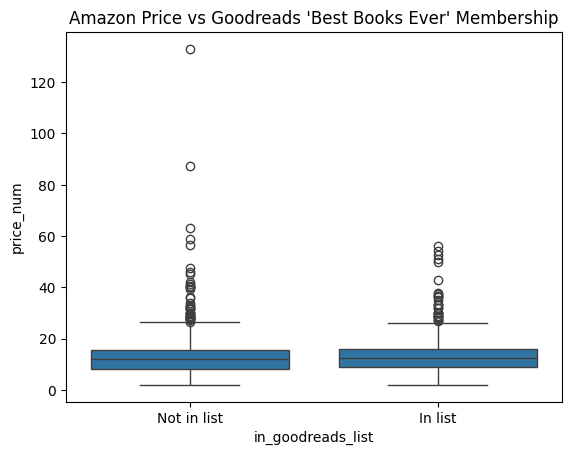

In [241]:
#visuals: Are Goodreads-list books rated/priced differently on Amazon?
AR_COL = AR_COL or "Average Rating"  # best guess fallback
PRICE_COL = PRICE_COL or "Price"

if AR_COL in merged.columns:
    merged["amazon_rating_num"] = pd.to_numeric(merged[AR_COL], errors="coerce")
if PRICE_COL in merged.columns:
    merged["price_num"] = pd.to_numeric(merged[PRICE_COL], errors="coerce")

merged["in_goodreads_list"] = merged["Rank"].notna()

# Boxplot: Ratings vs membership
if "amazon_rating_num" in merged.columns:
    sns.boxplot(data=merged, x="in_goodreads_list", y="amazon_rating_num")
    plt.xticks([0,1], ["Not in list", "In list"])
    plt.title("Amazon Rating vs Goodreads 'Best Books Ever' Membership")
    plt.show()

# Boxplot: Price vs membership
if "price_num" in merged.columns:
    sns.boxplot(data=merged, x="in_goodreads_list", y="price_num")
    plt.xticks([0,1], ["Not in list", "In list"])
    plt.title("Amazon Price vs Goodreads 'Best Books Ever' Membership")
    plt.show()

with open(f"{NOTES_DIR}/NOTES.txt","a",encoding="utf-8") as f:
    f.write("Drew simple boxplots to compare Amazon ratings/prices for books in the Goodreads list vs not.\n")


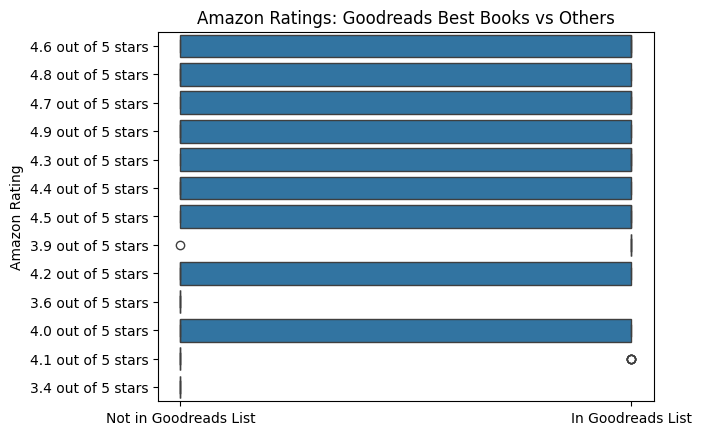

In [244]:
sns.boxplot(data=merged, x="in_goodreads", y="rating")
plt.xticks([0,1], ["Not in Goodreads List", "In Goodreads List"])
plt.title("Amazon Ratings: Goodreads Best Books vs Others")
plt.xlabel("")
plt.ylabel("Amazon Rating")
plt.show()


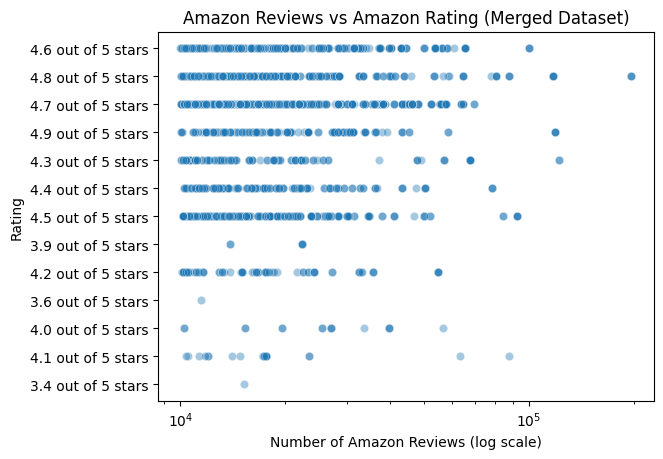

In [247]:
sns.scatterplot(data=merged, x="reviews_count", y="rating", alpha=0.4)
plt.xscale("log")
plt.title("Amazon Reviews vs Amazon Rating (Merged Dataset)")
plt.xlabel("Number of Amazon Reviews (log scale)")
plt.ylabel("Rating")
plt.show()
